# <데이터 분석 프로젝트 보고서>
<hr>

1. 프로젝트 개요
- 프로젝트 명 :
- 프로젝트 목적 :
- 프로젝트 진행 배경 :
<hr>

2. 결론
- 작성하기
<hr> 

3. 문제 정의
- 문제 정의 시 기준을 명확히 할것 
<hr> 

4. 데이터 수집
- 수집 사이트 
- 수집 데이터 정의
<hr> 

5. 데이터 정제
- 전처리(결측치 및 이상치 처리) 과정
- 활용 데이터 정의
    * 데이터 분석에 필요한 데이터 정의 – 컬럼명 명확하게
<hr> 

6. 데이터 분석 및 시각화
- 분석 소주제
- 분석 결과
- 분석 데이터
- 분석 결과 시각화
    * 그래프 타이틀 및 범례 표시

## - 데이터 불러오기

In [5]:
# 날짜 모듈
import datetime

# 결측값 확인
import missingno as msno

# 그래프 그릴때 필요한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 글자 출력 오류 해결 
import matplotlib
import matplotlib.font_manager as fm

font_location = 'c:/windows/fonts/H2GTRE.TTF'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family = font_name)

import warnings as wa
# 오류 메세지 차단
wa.filterwarnings("ignore")

# pandas, numpy 모듈
import pandas as pd
import numpy as np

data = pd.read_csv('data/경찰청_범죄 발생 지역별 통계_20151231.csv', encoding='cp949')

data


,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,경기 고양,경기 과천,경기 광명,경기 광주,경기 구리,경기 군포,경기 김포,경기 남양주,경기 동두천,경기 부천,경기 성남,경기 수원,경기 시흥,경기 안산,경기 안성,경기 안양,경기 양주,경기 여주,경기 오산,경기 용인,경기 의왕,경기 의정부,경기 이천,경기 파주,경기 평택,경기 포천,경기 하남,경기 화성,강원 강릉,강원 동해,강원 삼척,강원 속초,강원 원주,강원 춘천,강원 태백,충북 제천,충북 청주,충북 충주,충남 계룡,충남 공주,충남 논산,충남 당진,충남 보령,충남 서산,충남 아산,충남 천안,전북 군산,전북 김제,전북 남원,전북 익산,전북 전주,전북 정읍,전남 광양,전남 나주,전남 목포,전남 순천,전남 여수,경북 경산,경북 경주,경북 구미,경북 김천,경북 문경,경북 상주,경북 안동,경북 영주,경북 영천,경북 포항,경남 거제,경남 김해,경남 마산,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,강력범죄,살인기수,67,20,13,17,11,8,12,2,8,2,1,4,0,1,2,5,0,7,4,6,9,8,0,2,1,1,2,7,0,0,3,3,1,4,1,7,1,1,0,0,5,3,0,2,4,1,0,0,3,0,3,0,5,4,0,0,0,3,4,0,0,0,2,1,4,1,3,3,0,1,1,2,1,0,1,2,1,0,1,0,2,4,7,2,0,11,7,30
1,강력범죄,살인미수등,96,41,23,34,7,16,11,1,9,0,1,8,3,1,3,6,3,13,6,7,6,12,2,6,2,3,2,5,0,7,2,4,6,3,0,8,4,1,0,1,5,3,0,5,15,1,0,2,3,1,5,1,4,8,6,0,0,5,7,1,3,1,0,1,2,2,4,2,1,0,0,0,0,2,7,1,7,0,5,5,6,0,13,2,1,16,4,44
2,강력범죄,강도,274,161,60,103,44,64,29,0,14,0,4,4,6,5,7,12,0,25,30,38,14,42,2,7,5,5,4,11,1,15,8,5,20,3,1,12,8,0,0,0,9,9,0,2,30,6,0,0,4,3,3,6,2,22,7,1,2,14,21,0,1,0,9,9,6,14,9,13,3,1,1,0,9,5,10,4,17,0,1,4,2,13,26,3,4,29,4,65
3,강력범죄,강간,969,383,216,304,216,181,132,3,73,0,12,25,22,26,33,50,6,105,83,157,36,86,23,52,19,13,23,53,8,67,23,29,50,17,11,32,28,5,10,6,48,10,1,15,79,15,1,14,13,11,10,11,27,82,21,13,11,34,68,16,14,4,42,34,43,23,30,50,14,5,9,25,9,9,48,23,42,0,10,12,35,63,85,11,14,64,18,328
4,강력범죄,유사강간,118,24,21,35,17,14,10,1,9,0,0,3,1,2,5,2,0,12,12,21,5,2,0,4,1,0,2,9,0,10,3,3,6,1,1,4,5,1,0,2,2,9,3,2,4,5,0,1,1,0,4,7,2,6,2,0,1,3,4,1,1,1,1,5,2,2,2,6,1,2,1,2,1,0,4,2,1,0,1,1,3,1,8,1,1,12,0,33
5,강력범죄,강제추행,4282,991,645,924,495,362,293,34,256,20,77,49,73,67,75,132,36,291,319,425,171,242,42,180,44,17,81,209,30,157,59,89,161,47,25,133,56,32,12,20,75,71,8,26,229,55,6,27,39,32,26,48,64,177,62,17,21,59,176,24,19,5,81,72,51,54,55,81,25,12,13,36,23,14,90,62,114,1,20,22,59,58,172,36,32,165,28,764
6,강력범죄,기타강간강제추행등,94,37,20,31,22,12,9,0,7,0,2,2,3,0,2,9,0,7,14,23,6,6,3,4,3,2,2,7,0,6,4,2,4,3,0,2,1,1,3,2,7,7,2,3,12,0,0,1,0,1,1,2,2,10,4,3,0,2,6,1,2,1,3,3,1,1,3,4,2,1,1,4,4,0,8,1,7,0,1,2,1,4,13,3,1,11,2,55
7,강력범죄,방화,315,117,86,94,48,41,36,5,40,1,6,6,9,7,13,26,1,38,29,40,25,30,4,12,8,2,4,15,5,22,10,9,19,17,4,14,5,4,6,3,6,3,0,3,23,4,0,3,8,4,4,5,4,22,9,5,3,10,11,6,3,0,8,7,13,5,6,10,4,2,2,8,6,3,16,12,9,0,2,7,9,12,33,0,12,23,4,148
8,절도범죄,절도,55280,20136,12759,10679,8438,9495,5449,638,3287,170,1234,1072,1042,944,1082,1888,410,5048,3941,6487,1791,4154,844,2142,719,417,1164,2791,307,2304,655,1136,2160,580,575,2178,832,288,188,344,1785,1132,130,524,4691,925,53,423,634,1325,681,769,1487,3945,1470,344,276,1391,3402,565,461,46,1520,1188,1049,1174,1297,2212,506,227,322,679,245,298,2496,1395,2739,2,313,358,1205,2032,5860,602,921,3309,643,11754
9,폭력범죄,상해,7174,4675,2736,2179,1162,1516,1353,117,490,22,147,237,181,142,160,392,102,524,734,938,295,694,141,396,157,130,149,454,57,326,161,261,460,229,104,410,352,202,155,174,514,379,82,172,798,265,24,137,155,215,137,179,341,522,283,65,101,246,496,108,194,5,415,354,347,248,347,508,200,100,127,257,134,118,616,490,595,1,134,194,307,408,1187,321,269,532,149,3941


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 90 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄대분류   38 non-null     object
 1   범죄중분류   38 non-null     object
 2   서울      38 non-null     int64 
 3   부산      38 non-null     int64 
 4   대구      38 non-null     int64 
 5   인천      38 non-null     int64 
 6   광주      38 non-null     int64 
 7   대전      38 non-null     int64 
 8   울산      38 non-null     int64 
 9   세종      38 non-null     int64 
 10  경기 고양   38 non-null     int64 
 11  경기 과천   38 non-null     int64 
 12  경기 광명   38 non-null     int64 
 13  경기 광주   38 non-null     int64 
 14  경기 구리   38 non-null     int64 
 15  경기 군포   38 non-null     int64 
 16  경기 김포   38 non-null     int64 
 17  경기 남양주  38 non-null     int64 
 18  경기 동두천  38 non-null     int64 
 19  경기 부천   38 non-null     int64 
 20  경기 성남   38 non-null     int64 
 21  경기 수원   38 non-null     int64 
 22  경기 시흥   38 non-null     int6

## - 결측값 확인하기

<Axes: >

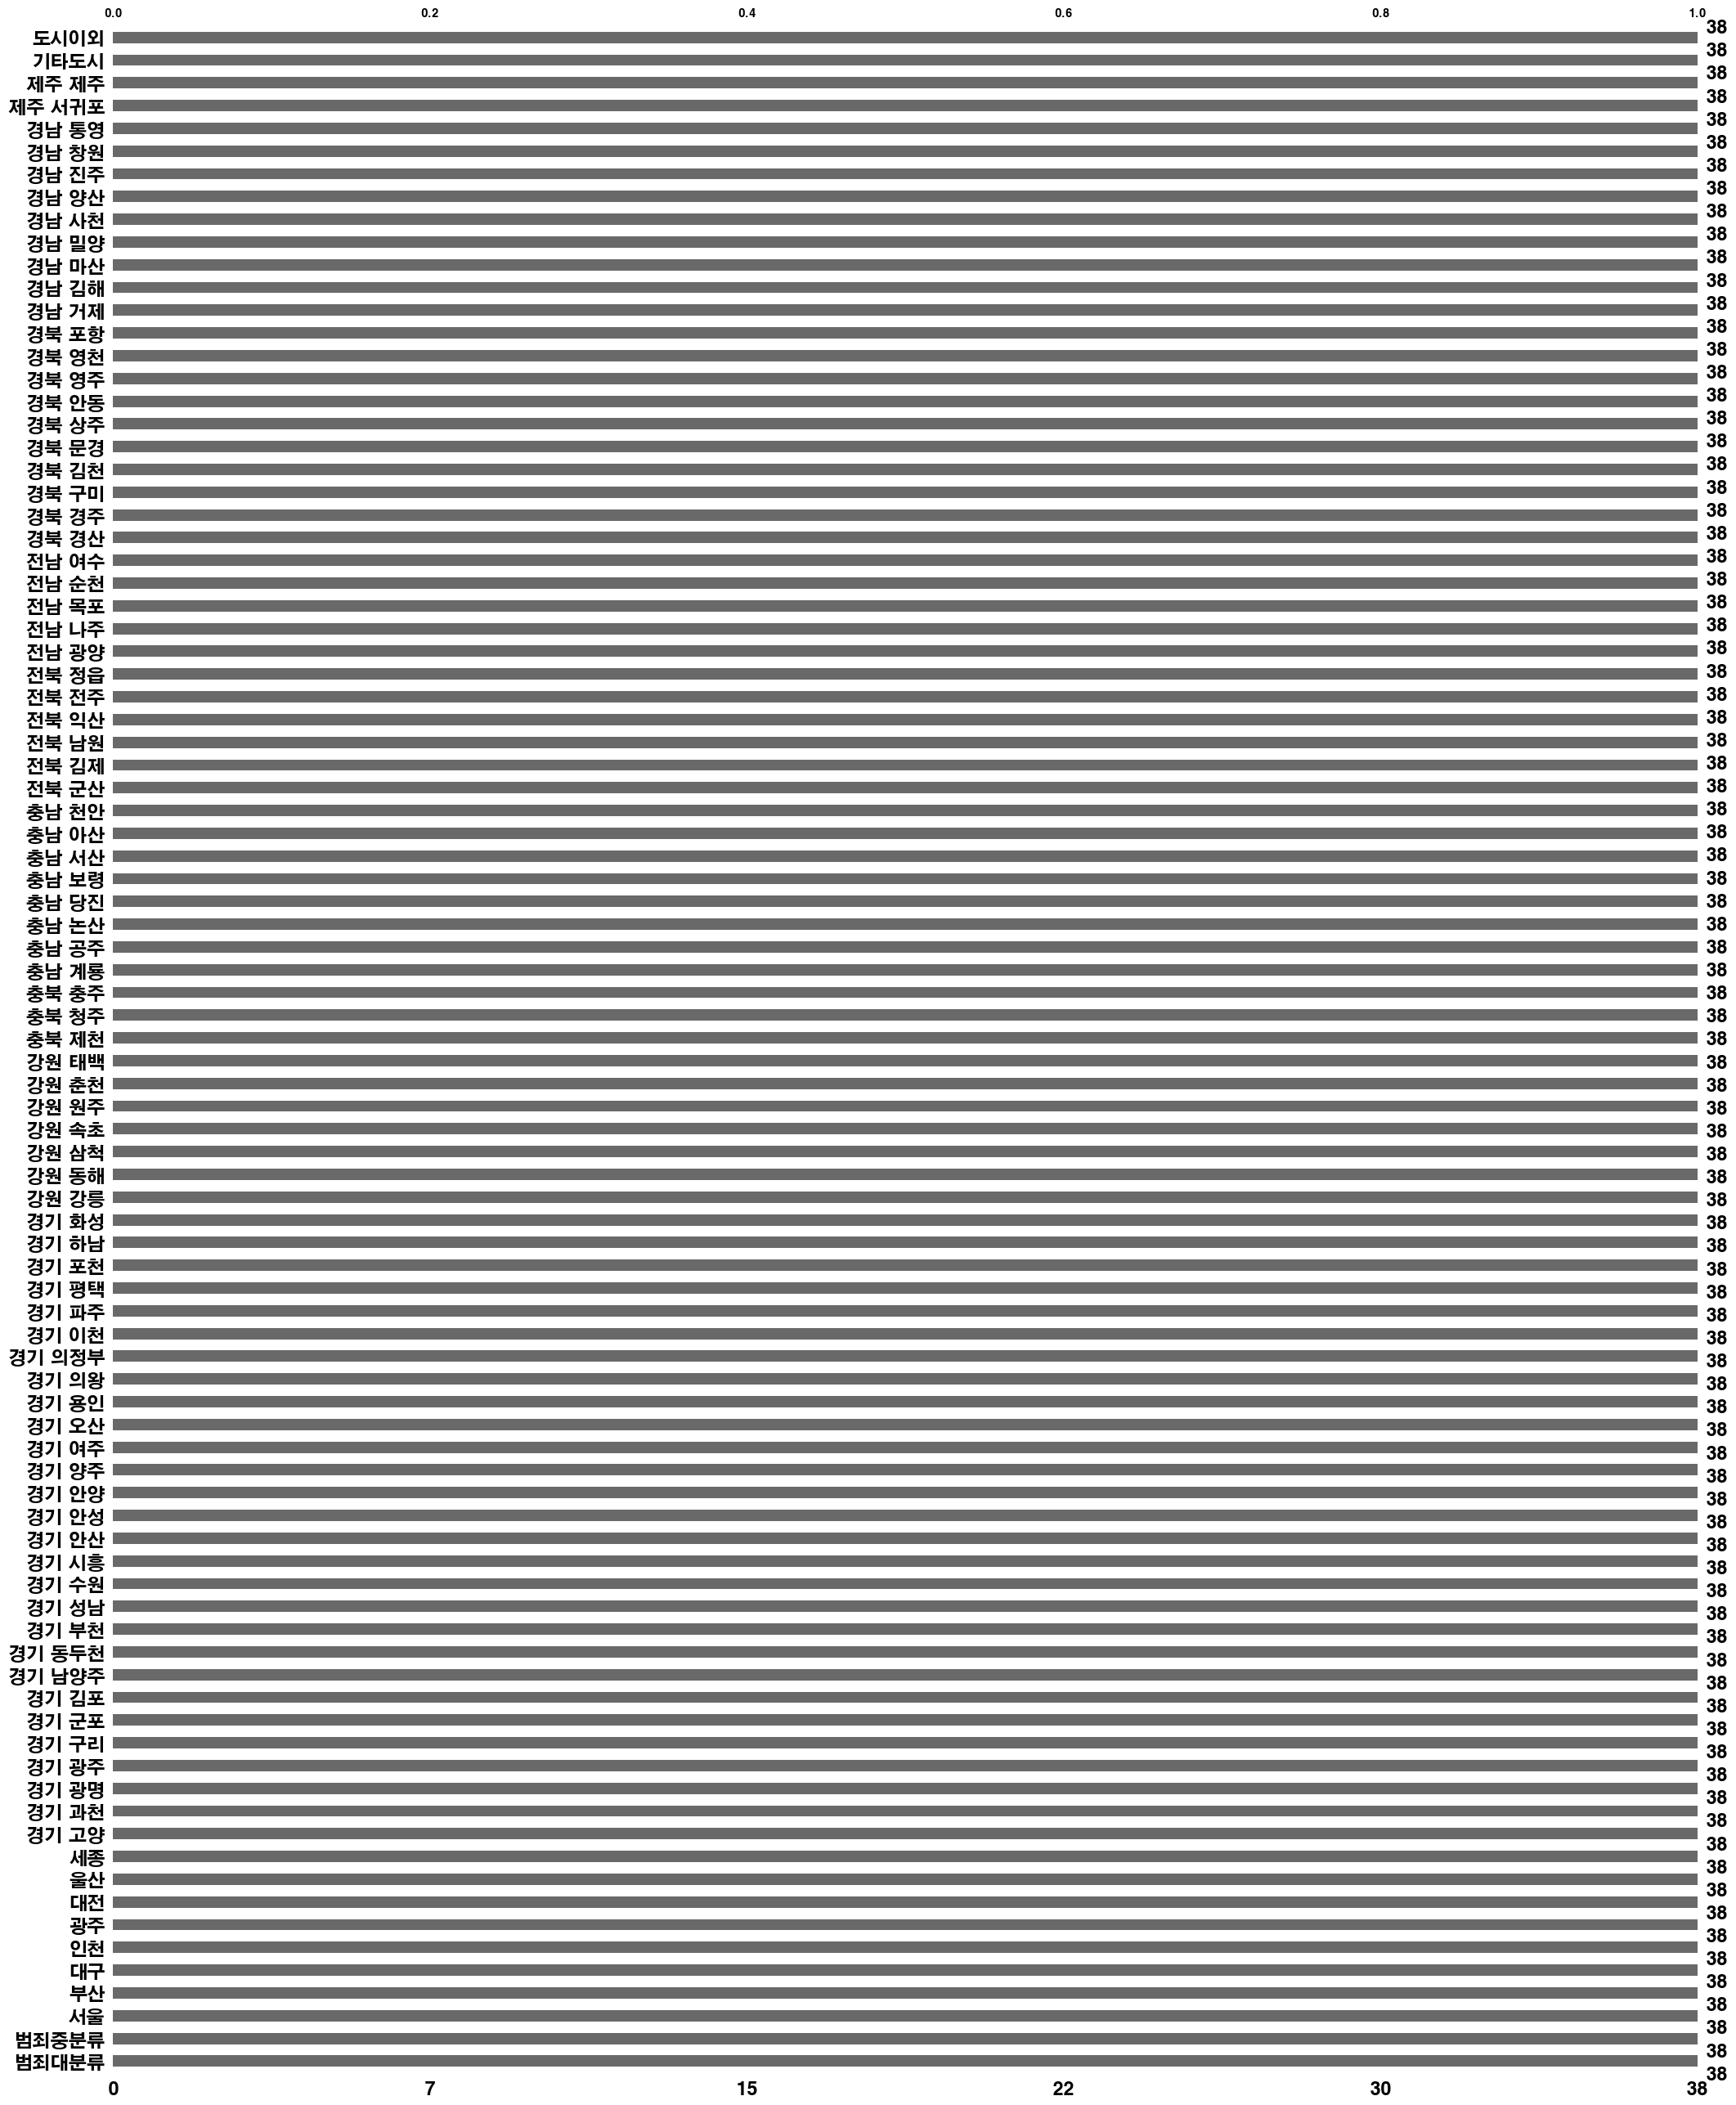

In [7]:
msno.bar(data)

In [8]:
data.isna().sum()

범죄대분류     0
범죄중분류     0
서울        0
부산        0
대구        0
         ..
경남 통영     0
제주 서귀포    0
제주 제주     0
기타도시      0
도시이외      0
Length: 90, dtype: int64

In [9]:
data.dtypes

범죄대분류     object
범죄중분류     object
서울         int64
부산         int64
대구         int64
           ...  
경남 통영      int64
제주 서귀포     int64
제주 제주      int64
기타도시       int64
도시이외       int64
Length: 90, dtype: object

## 1. 제일 많이 일어나는 범죄

In [35]:
# 범죄대분류를 각각의 범죄별로 그룹화 시켜서 갯수 세기
data_count = data.groupby(['범죄대분류'])['범죄대분류'].count()
# data_count

# data의 전체 갯수
length = len(data)
# length

# 소수점은 뒤에 2자리만 출력
result = (data_count/length).round(2)
result

범죄대분류
강력범죄      0.21
교통범죄      0.03
기타범죄      0.03
노동범죄      0.03
마약범죄      0.03
병역범죄      0.03
보건범죄      0.03
선거범죄      0.03
안보범죄      0.03
절도범죄      0.03
지능범죄      0.24
특별경제범죄    0.03
폭력범죄      0.21
풍속범죄      0.05
환경범죄      0.03
Name: 범죄대분류, dtype: float64

In [36]:
# 전치로 행과 열 변환 후 수치 확인
data_ratio = pd.DataFrame(result).T
data_ratio

범죄대분류,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
범죄대분류,0.21,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.24,0.03,0.21,0.05,0.03


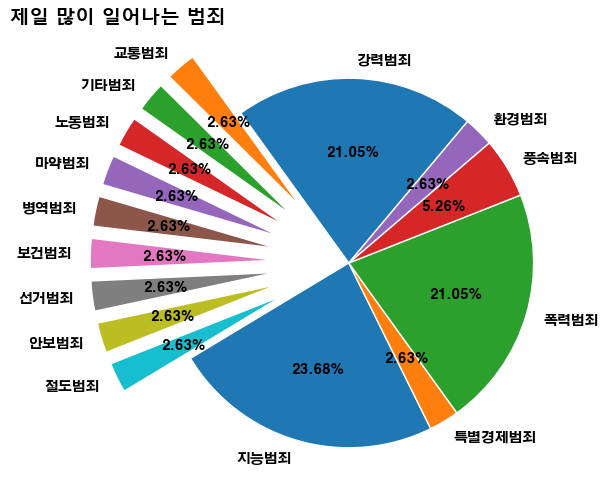

In [106]:
# pie는 labels이 있어야 출력된다. 
labels = ['강력범죄', '교통범죄', '기타범죄', '노동범죄', '마약범죄',
          '병역범죄', '보건범죄', '선거범죄', '안보범죄', '절도범죄',
          '지능범죄', '특별경제범죄', '폭력범죄', '풍속범죄', '환경범죄']

# explode: 부채꼴이 파이 차트의 중심에서 벗어나는 정도
explode = [0, 0.4, 0.4, 0.4, 0.4, 
           0.4, 0.4, 0.4, 0.4, 0.4,
           0, 0, 0, 0, 0]

# wedgeprops: 테두리를 추가한다.
wedgeprops = {'edgecolor' : 'w'}

# startangle: 파이 차트의 각도를 돌린다.
plt.figure(figsize=(7, 6))
plt.pie(data_count/length, labels=labels, autopct='%1.2f%%', wedgeprops=wedgeprops, explode=explode, startangle=50)
plt.title('제일 많이 일어나는 범죄', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()